In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns

/kaggle/input/world-rural-population/world-rural-population-v1.csv


In [2]:
df = pd.read_csv('../input/world-rural-population/world-rural-population-v1.csv')

Now, let's see how the dataset looks like:

In [3]:
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,26683.0,27295.0,27697.0,27936.0,28107.0,28277.0,28456.0,28633.0,...,58230.0,58506.0,58814.0,59110.0,59361.0,59572.0,59747.0,59897.0,60016.0,60112.0
1,Africa Eastern and Southern,AFE,111597625.0,114110332.0,116717022.0,119394205.0,122140071.0,124963818.0,127863551.0,130848646.0,...,358859175.0,366421044.0,374087585.0,381804769.0,389549737.0,397309170.0,405073414.0,412813896.0,420506755.0,428130824.0
2,Afghanistan,AFG,8241132.0,8373135.0,8512057.0,8657973.0,8810638.0,8970244.0,9133649.0,9300663.0,...,22904893.0,23632789.0,24404524.0,25165924.0,25877997.0,26530194.0,27131343.0,27694940.0,28244483.0,28796851.0
3,Africa Western and Central,AFW,82254748.0,83593412.0,84979354.0,86400362.0,87851320.0,89328091.0,90869502.0,92443341.0,...,208012011.0,211404928.0,214830600.0,218280270.0,221750635.0,225245547.0,228753833.0,232268264.0,235777809.0,239272321.0
4,Angola,AGO,4885715.0,4934165.0,4980123.0,5019234.0,5043469.0,5049021.0,5031759.0,4998298.0,...,9560379.0,9724802.0,9885478.0,10040929.0,10192856.0,10340318.0,10483874.0,10625063.0,10764271.0,10903384.0


Let´s see if there is any null numbers across the data

<AxesSubplot:>

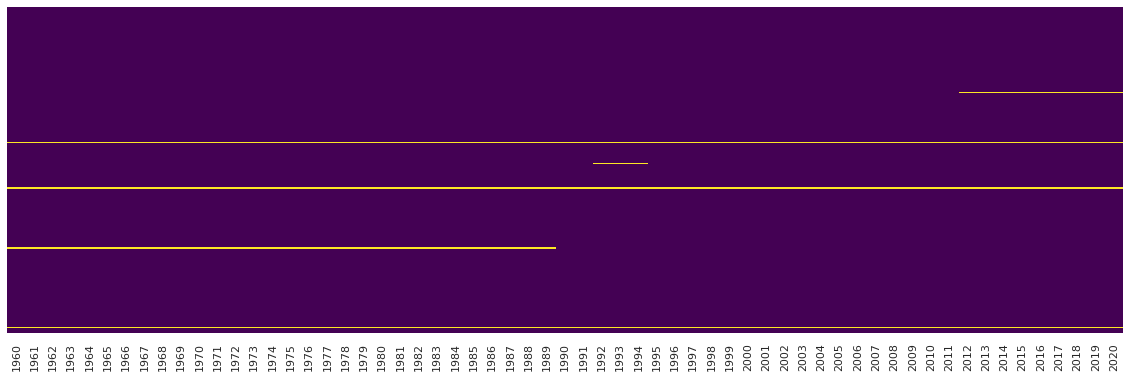

In [4]:
sns.set(rc={'figure.figsize':(20,6)})
sns.heatmap(df.iloc[:,2:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see here, there are 4 countries which have null values across the dataset. Let's take a look:

In [5]:
df.transpose().isnull().sum().sort_values(ascending = False).head(10)

261    61
147    61
110    61
196    30
69      9
127     3
176     0
180     0
179     0
178     0
dtype: int64

So now we can see the indexes of the countries that have any null values. Based on that we have 60 years of data, we will drop the first four countries because we do not much data. Let's see who they are

In [6]:
df.iloc[[261,147,110, 196]]['Country Name']

261                      Kosovo
147    St. Martin (French part)
110              Not classified
196          West Bank and Gaza
Name: Country Name, dtype: object

Now, let´s see which are the countries who have 9 and 3 null data

In [7]:
df.iloc[[69,127]]['Country Name']

69     Eritrea
127     Kuwait
Name: Country Name, dtype: object

Now, we will set the Country Name as index

Continuing with the analysis of Eritrea and Kuwait, we can realise that they have 0 values across the dataset.

In [8]:
df.iloc[[69,127]]

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
69,Eritrea,ERI,908853.0,928810.0,949795.0,971567.0,993869.0,1016537.0,1039438.0,1062647.0,...,2064300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Kuwait,KWT,67544.0,72780.0,78737.0,85178.0,91813.0,97838.0,100888.0,103422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let´s check if there are other countries which values are equals to 0:

<AxesSubplot:>

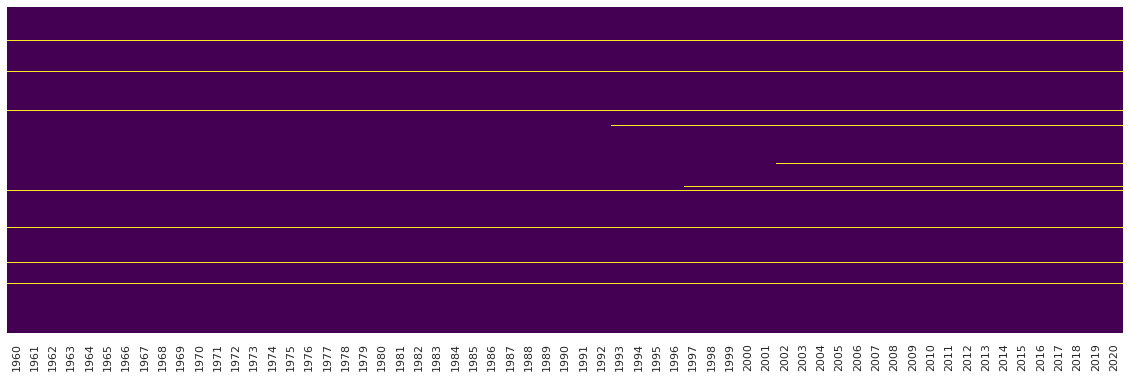

In [9]:
sns.set(rc={'figure.figsize':(20,6)})
sns.heatmap(df.iloc[:,2:] == 0,yticklabels=False,cbar=False,cmap='viridis')

So, let´s repeat some steps made before

In [10]:
df[(df == 0)].transpose().count().sort_values(ascending = False).head(10)

84     61
52     61
179    61
149    61
27     61
208    61
225    61
96     28
146    24
127    19
dtype: int64

Let´s see who they are:

In [11]:
df.iloc[[84,52,179,149,27,208,225,96,146,127]]['Country Name']

84                     Gibraltar
52                Cayman Islands
179                        Nauru
149                       Monaco
27                       Bermuda
208                    Singapore
225    Sint Maarten (Dutch part)
96          Hong Kong SAR, China
146             Macao SAR, China
127                       Kuwait
Name: Country Name, dtype: object

So, to recap, we need to drop the countries to which we have null values (execpt for Eritrea and Kuwait because they have a few null values) and zero values.

In [12]:
df = df.drop([84, 52, 179, 149, 27, 208, 225, 96, 146, 127, 261, 147, 110, 196], axis = 0)

So, now that we have our dataset completed, it´s a good idea to shape it and make the years as datetime.

1. Set Country Name and Country Code as index and then transpose the matrix
2. Convert to datetime the index

In [13]:
df = df.set_index(['Country Name']).transpose()
df = df.transpose().drop(['Country Code'],axis = 1).transpose()
df.index = pd.to_datetime(df.index)
df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,26683.0,111597625.0,8241132.0,82254748.0,4885715.0,1114818.0,5572.0,63400548.0,24491.0,5404937.0,...,7068.0,14145.0,27867551.0,57063.0,2012175449.0,88068.0,4831654.0,9128063.0,2513587.0,3300515.0
1961-01-01,27295.0,114110332.0,8373135.0,83593412.0,4934165.0,1146208.0,5610.0,64431702.0,25822.0,5367317.0,...,7134.0,14453.0,28605758.0,58747.0,2023066947.0,90826.0,4882907.0,9324278.0,2564658.0,3404373.0
1962-01-01,27697.0,116717022.0,8512057.0,84979354.0,4980123.0,1180553.0,5619.0,65477732.0,27750.0,5337547.0,...,7236.0,14266.0,29352917.0,60495.0,2044148623.0,93701.0,4935554.0,9538726.0,2615526.0,3510800.0
1963-01-01,27936.0,119394205.0,8657973.0,86400362.0,5019234.0,1214693.0,5599.0,66521137.0,29915.0,5305828.0,...,7332.0,15680.0,30107982.0,62285.0,2074403280.0,96669.0,4989088.0,9760589.0,2664155.0,3611339.0
1964-01-01,28107.0,122140071.0,8810638.0,87851320.0,5043469.0,1248887.0,5553.0,67557440.0,31863.0,5271909.0,...,7446.0,15524.0,30871662.0,64084.0,2104220646.0,99638.0,5042799.0,9989720.0,2700785.0,3713677.0


In [14]:
tickers = df.columns
pct_growth_population = pd.DataFrame()
for tick in tickers:
    pct_growth_population[tick+' % change'] = df[tick].pct_change()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

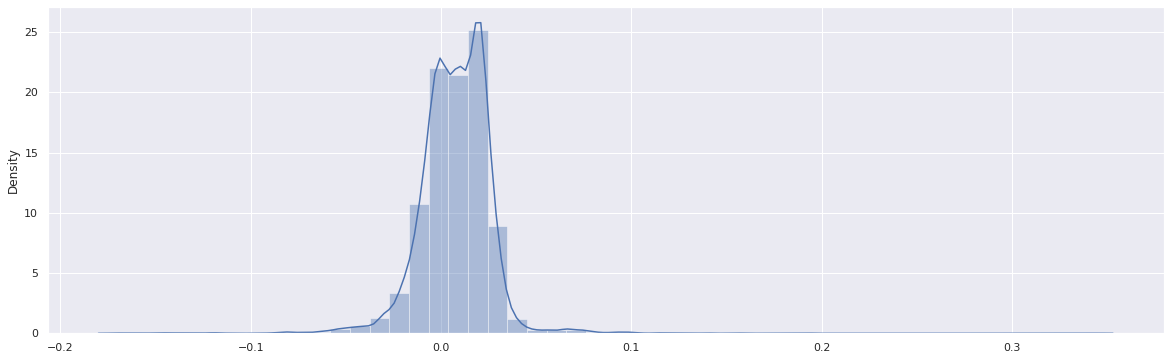

In [15]:
sns.set(rc={'figure.figsize':(20,6)})
sns.distplot(pct_growth_population)

As we can see in the distribution graph, the curve is slightly shifted to the right (positive growth)

Then looking at the boxplot of the values, we can see a very notorious outlier (above 0.3%):

<AxesSubplot:>

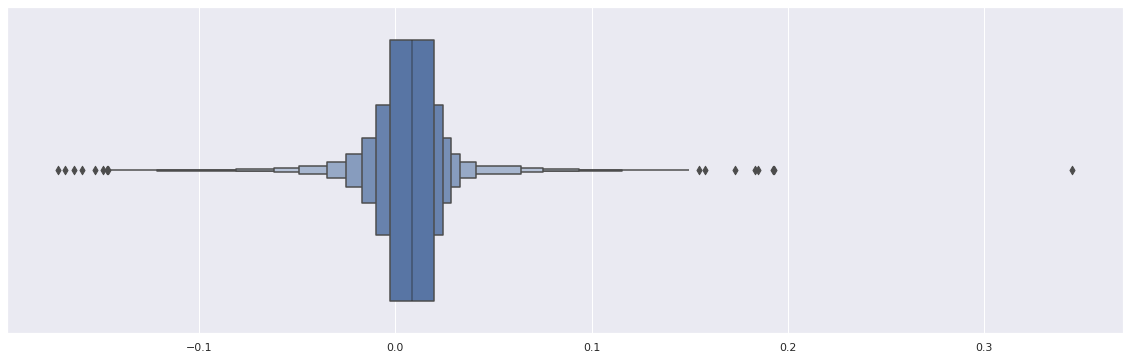

In [16]:
sns.boxenplot(x=pct_growth_population.values)

Let´s finde it

In [17]:
pct_growth_population.max().sort_values(ascending = False)

Cambodia % change                     0.344851
United Arab Emirates % change         0.192835
Somalia % change                      0.118469
Liberia % change                      0.115227
Qatar % change                        0.102023
                                        ...   
Post-demographic dividend % change   -0.001981
Argentina % change                   -0.003272
Belgium % change                     -0.007174
Belarus % change                     -0.007573
Bulgaria % change                    -0.008456
Length: 252, dtype: float64

We´ve got it: Cambodia. Now let´s see when it happend such a big growth of its population

In [18]:
pct_growth_population.idxmax().loc['Cambodia % change']

Timestamp('1975-01-01 00:00:00')

Yeah! In 1975

<AxesSubplot:>

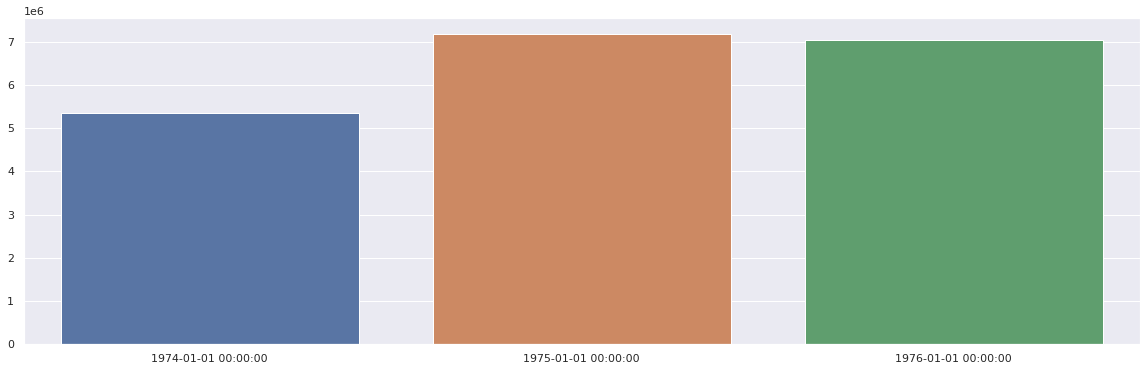

In [19]:
sns.barplot(x = df.loc['1974-01-01':'1976-01-01','Cambodia'].index,y = df.loc['1974-01-01':'1976-01-01','Cambodia'].values)

This is curious because, according to Wikipedia (https://es.wikipedia.org/wiki/Genocidio_camboyano#A%C3%B1o_Cero) in 1975 started the Cambodian genocide that lasts 5 years. This may be explained because the people left the city to radicate in the villages

The same way, let´s look at the opposite outlier. Turns to be Guam

In [20]:
pct_growth_population.min().sort_values(ascending = True)

Guam % change                                     -0.171873
Puerto Rico % change                              -0.148963
Curacao % change                                  -0.094242
Japan % change                                    -0.087024
San Marino % change                               -0.085072
                                                     ...   
Low income % change                                0.018225
Tanzania % change                                  0.018373
Heavily indebted poor countries (HIPC) % change    0.019367
Niger % change                                     0.021919
Uganda % change                                    0.024719
Length: 252, dtype: float64

In [21]:
pct_growth_population.idxmin()['Guam % change']

Timestamp('1979-01-01 00:00:00')

<AxesSubplot:>

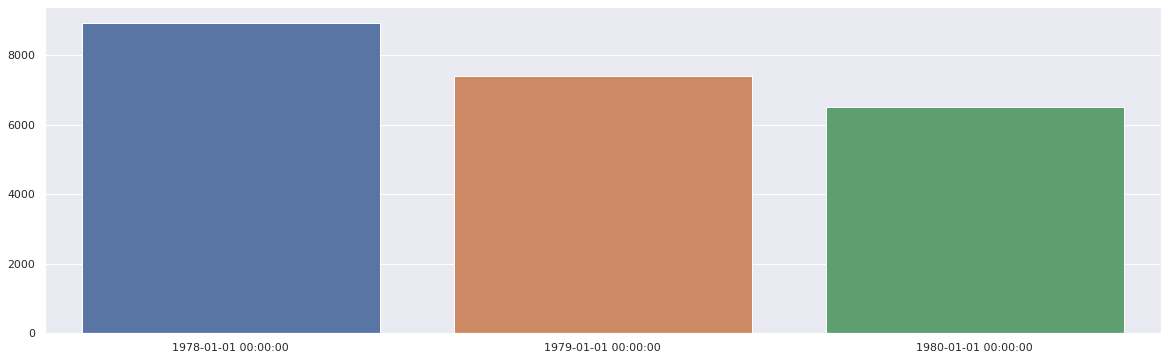

In [22]:
sns.barplot(x = df.loc['1978-01-01':'1980-01-01','Guam'].index,y = df.loc['1978-01-01':'1980-01-01','Guam'].values)

Now let's see from the beginning of the data set to the end, which are the countries whose rural population has grown the most and which have decreased.

In [23]:
tickers_change = pct_growth_population.columns
cummulative_change = pd.DataFrame()
for ticker in tickers_change:
    cummulative_change[ticker] = (1+pct_growth_population[ticker]).cumprod()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [24]:
overall_change = cummulative_change[-1:] - cummulative_change.iloc[1] -1
overall_change

,Aruba % change,Africa Eastern and Southern % change,Afghanistan % change,Africa Western and Central % change,Angola % change,Albania % change,Andorra % change,Arab World % change,United Arab Emirates % change,Argentina % change,...,British Virgin Islands % change,Virgin Islands (U.S.) % change,Vietnam % change,Vanuatu % change,World % change,Samoa % change,"Yemen, Rep. % change",South Africa % change,Zambia % change,Zimbabwe % change
2020-01-01,0.229884,1.813864,1.478266,0.892643,0.22177,-1.063691,-0.33112,0.771343,50.250786,-1.330724,...,0.193265,-1.716649,0.162162,1.979216,-0.314479,-0.181428,1.822353,0.099646,2.029424,1.019821


<AxesSubplot:>

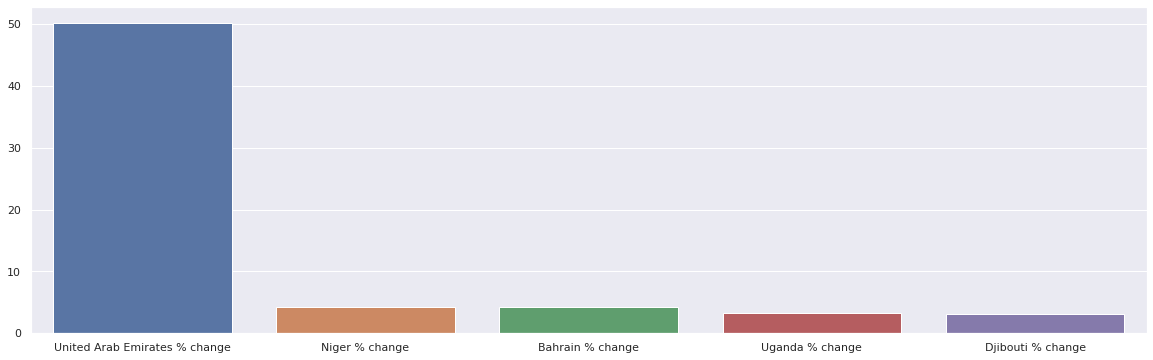

In [25]:
sns.barplot(x = overall_change.transpose()['2020-01-01'].sort_values(ascending = False).head(5).index, y = overall_change.transpose()['2020-01-01'].sort_values(ascending = False).head(5).values)

United Arab Emirates is the country which has growthn the most for the last 60 years.

<AxesSubplot:>

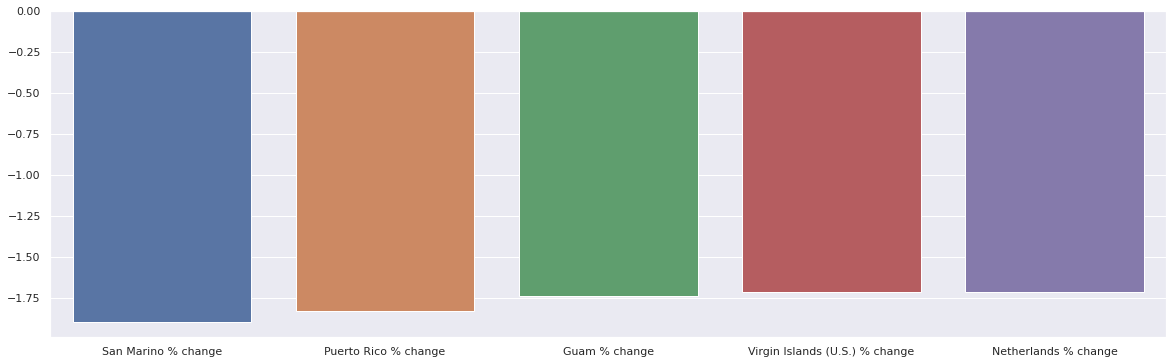

In [26]:
sns.barplot(x = overall_change.transpose()['2020-01-01'].sort_values(ascending = True).head(5).index, y = overall_change.transpose()['2020-01-01'].sort_values(ascending = True).head(5).values)

San Marino is the country for which the rural population has decreased the most.